In [1]:
from scipy import signal
import matplotlib.pyplot as plt

In [30]:
#init values
overlap = 128
frame_length = 1024

In [31]:
from scipy.io import wavfile

def readAudio(audio):
    fs, amp = wavfile.read(audio)
    dt = 1/fs
    n = len(amp)
    t = dt*n

    if t > 1.0:
        amp = amp[int((t/2 - 0.5)/dt):int((t/2 + 0.5)/dt)]
        n = len(amp)
        t = dt*n
    
    return(amp, fs)

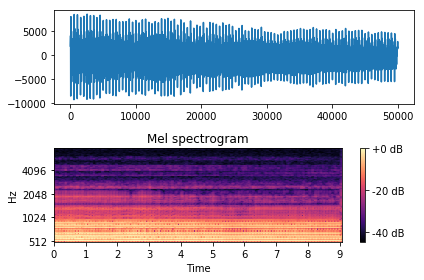

In [32]:
amp, fs = readAudio('dataset/male_healthy/4-a_n.wav')

plt.subplot(211)
plt.plot(amp)

plt.subplot(212)

import librosa
import librosa.display
import numpy as np

S = librosa.feature.melspectrogram(y=amp*1.0, sr=fs, n_fft=frame_length, hop_length=overlap, power=1.0, fmin=500.0)

librosa.display.specshow(librosa.power_to_db(S,ref=np.max), y_axis='mel', fmin=500.0, fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [47]:
print(librosa.power_to_db(S,ref=np.max).shape)
import numpy as np

dS = np.gradient(librosa.power_to_db(S,ref=np.max), axis=0)
dS.shape
ddS = np.gradient(dS, axis=0)wejfoids

(128, 391)


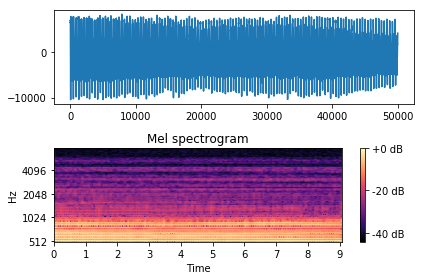

In [48]:
amp,fs = readAudio('dataset/male_pathology/106-a_n.wav')

plt.subplot(211)
plt.plot(amp)

plt.subplot(212)

import librosa
import librosa.display
import numpy as np

S = librosa.feature.melspectrogram(y=amp*1.0, sr=fs, n_fft=frame_length, hop_length=overlap, power=1.0, fmin=500.0)

librosa.display.specshow(librosa.power_to_db(S,ref=np.max), y_axis='mel', fmax=8000, fmin=500.0, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()